Scenario: build a new predictive model that can predict mpg of a vehicle with various characterisitcs. 

Variables:
1. Time of Day
2. Air Temperature (Celcius)
3. Humidity (a measure (%) of the actual amount of water vapor in the air compared to the total amount of vapor that can exist in the air at its current temperature.)
4. Dew Point (Celcius)
5. Barometric Pressure (mBar)
6. Wind Speed (km/hr)
7. Solar Radiation - w/m2

In [3]:
#DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [4]:
#Import and View the Data
solar = pd.read_csv('WholeYear.csv')
solar.head()

,Unnamed: 0,TimeofDay,AirTemp,Humidity,Dewpoint,BarPres,WindSpeed,SolarRad
0,1,15,2.616,76.6,-1.09,102.84,0.780,3.48
1,2,30,2.133,79.8,-1.00,102.85,0.891,3.49
2,3,45,2.017,79.1,-1.21,102.84,0.902,3.49
3,4,100,1.659,80.2,-1.39,102.84,0.890,3.49
4,5,115,1.618,79.3,-1.56,102.84,0.659,3.48


Preprocessing - add intro here

In [5]:
#check datatypes to ensure all data is numerical
solar.dtypes

Unnamed: 0      int64
TimeofDay       int64
AirTemp       float64
Humidity      float64
Dewpoint      float64
BarPres       float64
WindSpeed     float64
SolarRad      float64
dtype: object

In [6]:
#check for missing values and impute if necessary
print(solar.isnull().sum())

Unnamed: 0    0
TimeofDay     0
AirTemp       0
Humidity      0
Dewpoint      0
BarPres       0
WindSpeed     0
SolarRad      0
dtype: int64


In [7]:
#Drop uneeded columns (too many unique values and/or not relevant)
solar = solar.drop(columns=['Unnamed: 0','TimeofDay','WindSpeed']);

In [8]:
solar.head()

,AirTemp,Humidity,Dewpoint,BarPres,SolarRad
0,2.616,76.6,-1.09,102.84,3.48
1,2.133,79.8,-1.00,102.85,3.49
2,2.017,79.1,-1.21,102.84,3.49
3,1.659,80.2,-1.39,102.84,3.49
4,1.618,79.3,-1.56,102.84,3.48


In [9]:
#convert AirTemp to F
solar['AirTemp'] = solar['AirTemp'] * (9/5) + 32

In [10]:
#convert DewPoint to F
solar['Dewpoint'] = solar['Dewpoint'] * (9/5) + 32

In [11]:
solar.head()

,AirTemp,Humidity,Dewpoint,BarPres,SolarRad
0,36.7088,76.6,30.038,102.84,3.48
1,35.8394,79.8,30.200,102.85,3.49
2,35.6306,79.1,29.822,102.84,3.49
3,34.9862,80.2,29.498,102.84,3.49
4,34.9124,79.3,29.192,102.84,3.48


In [18]:
solarcov = solar.cov()
solarcov

,AirTemp,Humidity,Dewpoint,BarPres,SolarRad
AirTemp,237.966880,-11.342186,222.459610,-2.347438,1567.554282
Humidity,-11.342186,443.191897,191.669424,-2.690288,-2844.863069
Dewpoint,222.459610,191.669424,303.914026,-3.393120,192.663643
BarPres,-2.347438,-2.690288,-3.393120,0.305923,11.671615
SolarRad,1567.554282,-2844.863069,192.663643,11.671615,69700.022199


In [13]:
solar.corr()

,AirTemp,Humidity,Dewpoint,BarPres,SolarRad
AirTemp,1.000000,-0.034925,0.827213,-0.275125,0.384900
Humidity,-0.034925,1.000000,0.522254,-0.231045,-0.511857
Dewpoint,0.827213,0.522254,1.000000,-0.351899,0.041861
BarPres,-0.275125,-0.231045,-0.351899,1.000000,0.079930
SolarRad,0.384900,-0.511857,0.041861,0.079930,1.000000


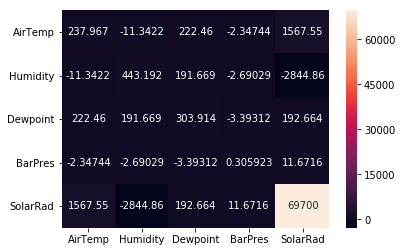

In [17]:
sns.heatmap(solarcov, annot=True, fmt='g')

EDA Intro here

In [64]:
#Descriptive Stats
solar.describe()

,AirTemp,Humidity,Dewpoint,BarPres,SolarRad
count,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000
mean,61.847794,69.782139,50.475156,101.971642,182.197669
std,15.426175,21.052123,17.433130,0.553103,264.007618
min,16.556000,9.980000,-7.096000,99.960000,3.480000
25%,50.342000,54.320000,35.870000,101.650000,4.160000
50%,65.210000,73.900000,55.868000,101.970000,7.840000
75%,73.130000,88.400000,65.606000,102.270000,306.100000
max,93.812000,98.900000,74.462000,103.810000,1089.000000


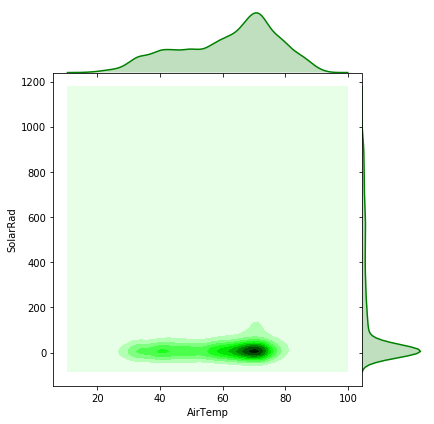

In [69]:
sns.jointplot('AirTemp', 'SolarRad', data = solar, kind = 'kde', space=0, color='g' )

In [71]:
#split data (rather than use CV)
#Features
X = solar.iloc[:,0:4]
X.head()

,AirTemp,Humidity,Dewpoint,BarPres
0,36.7088,76.6,30.038,102.84
1,35.8394,79.8,30.200,102.85
2,35.6306,79.1,29.822,102.84
3,34.9862,80.2,29.498,102.84
4,34.9124,79.3,29.192,102.84


In [73]:
#Dep Var
y = solar.iloc[:,4]
y.head()

0    3.48
1    3.49
2    3.49
3    3.49
4    3.48
Name: SolarRad, dtype: float64

In [74]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [81]:
#Modeling
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

/home/obiwankanobe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
#Predictions
preds = model.predict(X_test)

In [83]:
#Accuracy
print('R Squared score is: %.3f' % r2_score(y_test, preds))

R Squared score is: 0.626


<b>Question 2: What is the Accuracy Paradox?</b>

In [16]:
pickle.dump(model, open("iris_model.pkl", "wb"))

In [17]:
my_model = pickle.load(open("iris_model.pkl", "rb"))

In [23]:
url = "http://localhost:9000/api"
data = json.dumps({'SepalLengthCm':6.3,'SepalWidthCm':2.9, 'PetalLengthCm':5.6,'PetalWidthCm':1.8}) 
r = requests.post(url, data)

In [24]:
print(r.json())

{'results': {'y_hat': 2}}
